In [151]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sys
from pathlib import Path
import zipfile
import requests
import json
import datetime as dt
import io

In [4]:
neighborhoods = pd.read_csv('kansas_city_neighborhood_zones.csv', index_col='Neighborhood Group')
armourdale_bounds = neighborhoods.loc[['Armourdale Renewal    As-sociation']]

# River

In [5]:
river = gpd.read_file("https://maps.wycokck.org/gisdata/shp/river_py.zip")

c:\Users\sdotson\AppData\Local\miniforge3\envs\danger-season\lib\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)
c:\Users\sdotson\AppData\Local\miniforge3\envs\danger-season\lib\site-packages\pyogrio\geopandas.py:54: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, utc=True, **datetime_kwargs)
c:\Users\sdotson\AppData\Local\miniforge3\envs\danger-season\lib\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)
c:\Users\sdotson\AppData\Local\miniforge3\envs\dang

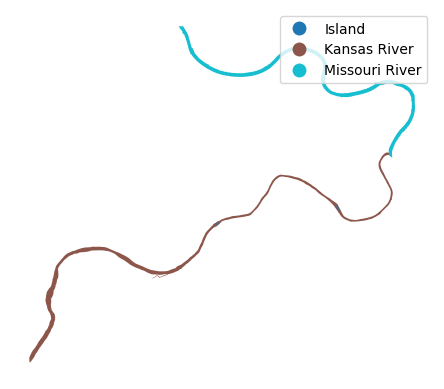

In [10]:
ax = river.plot(column='Name', categorical=True, legend=True)
ax.set_axis_off()

In [11]:
kck_lng = gpd.read_file("https://maps.wycokck.org/gisdata/shp/nbhd_grp_py.zip")

c:\Users\sdotson\AppData\Local\miniforge3\envs\danger-season\lib\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)
c:\Users\sdotson\AppData\Local\miniforge3\envs\danger-season\lib\site-packages\pyogrio\geopandas.py:54: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, utc=True, **datetime_kwargs)
c:\Users\sdotson\AppData\Local\miniforge3\envs\danger-season\lib\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)
c:\Users\sdotson\AppData\Local\miniforge3\envs\dang

In [13]:
kck_lng

,NAME,DATE_MOD,DATE_ADDED,MOD_BY,ADDED_BY,Shape__Are,Shape__Len,geometry
0,QUINDARO URBAN,0000/00/00,0000/00/00,None,None,2.285212e+07,20911.165258,"POLYGON ((2256984.000 317617.406, 2258960.500 ..."
1,PARKWOOD COLONY,0000/00/00,0000/00/00,None,None,5.816636e+06,10223.022924,"POLYGON ((2264920.505 312414.983, 2265474.750 ..."
2,BRENTWOOD HILLS,0000/00/00,0000/00/00,None,None,1.818643e+06,5257.950147,"POLYGON ((2256977.000 314065.594, 2256993.750 ..."
3,QUINDARO HOMES,0000/00/00,0000/00/00,None,None,5.327865e+06,10345.782714,"POLYGON ((2266982.250 313584.469, 2268380.500 ..."
4,GERDING GARDENS,0000/00/00,0000/00/00,None,None,5.191458e+06,9244.083313,"POLYGON ((2259712.750 311296.719, 2259730.250 ..."
...,...,...,...,...,...,...,...,...
68,CROSSLINES,2021/11/30,2021/11/30,rringel,rringel,1.531895e+05,1823.090299,"POLYGON ((2258649.676 287984.084, 2258639.255 ..."
69,CARING,2023/01/23,2023/01/20,rringel,rringel,3.445224e+06,7724.739304,"POLYGON ((2270515.850 308149.698, 2270606.562 ..."
70,HAZELWOOD HOA,2023/01/23,2023/01/23,rringel,rringel,1.815385e+06,5744.971929,"POLYGON ((2207530.507 305253.263, 2207517.784 ..."
71,PARKWAY VILLAGE HOA,2023/01/23,2023/01/23,rringel,rringel,7.029594e+05,3345.892976,"POLYGON ((2227232.478 305955.367, 2227221.390 ..."


In [20]:
river.crs

<Projected CRS: EPSG:3419>
Name: NAD83 / Kansas North (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Kansas - counties of Atchison; Brown; Cheyenne; Clay; Cloud; Decatur; Dickinson; Doniphan; Douglas; Ellis; Ellsworth; Geary; Gove; Graham; Jackson; Jefferson; Jewell; Johnson; Leavenworth; Lincoln; Logan; Marshall; Mitchell; Morris; Nemaha; Norton; Osborne; Ottawa; Phillips; Pottawatomie; Rawlins; Republic; Riley; Rooks; Russell; Saline; Shawnee; Sheridan; Sherman; Smith; Thomas; Trego; Wabaunsee; Wallace; Washington; Wyandotte.
- bounds: (-102.06, 38.52, -94.58, 40.01)
Coordinate Operation:
- name: SPCS83 Kansas North zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [21]:
kck_lng.crs

<Compound CRS: EPSG:8739>
Name: NAD83 / Kansas North (ftUS) + NAVD88 height (ftUS)
Axis Info [cartesian|vertical]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
- H[up]: Gravity-related height (US survey foot)
Area of Use:
- name: United States (USA) - Kansas - counties of Atchison; Brown; Cheyenne; Clay; Cloud; Decatur; Dickinson; Doniphan; Douglas; Ellis; Ellsworth; Geary; Gove; Graham; Jackson; Jefferson; Jewell; Johnson; Leavenworth; Lincoln; Logan; Marshall; Mitchell; Morris; Nemaha; Norton; Osborne; Ottawa; Phillips; Pottawatomie; Rawlins; Republic; Riley; Rooks; Russell; Saline; Shawnee; Sheridan; Sherman; Smith; Thomas; Trego; Wabaunsee; Wallace; Washington; Wyandotte.
- bounds: (-102.06, 38.52, -94.58, 40.01)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Sub CRS:
- NAD83 / Kansas North (ftUS)
- NAVD88 height (ftUS)

In [26]:
historic_dist = gpd.read_file("https://maps.wycokck.org/gisdata/shp/historic_dist_py.zip")

c:\Users\sdotson\AppData\Local\miniforge3\envs\danger-season\lib\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)
c:\Users\sdotson\AppData\Local\miniforge3\envs\danger-season\lib\site-packages\pyogrio\geopandas.py:54: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, utc=True, **datetime_kwargs)
c:\Users\sdotson\AppData\Local\miniforge3\envs\danger-season\lib\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)
c:\Users\sdotson\AppData\Local\miniforge3\envs\dang

In [27]:
historic_dist

,NAME,LOCATION,KCK_DATE,STATE_DATE,USA_DATE,ARCH_BUILD,COMMENTS,DATE_MOD,DATE_ADDED,MOD_BY,ADDED_BY,SHAPE_STAr,SHAPE_STLe,geometry
0,Westheight Manor,"North 18th Street to North 25th Street, State ...",0000/00/00,1977/07/01,1975/03/26,"Hare and Hare, Planners and Landscape Architects","State approved expansion August 10, 1981 USA ...",0000/00/00,0000/00/00,None,None,4.219916e+06,9562.150347,"POLYGON ((2262674.000 305549.906, 2262676.195 ..."
1,Hanover Heights,"State Line Road to Rainbow Boulevard, Olathe B...",0000/00/00,1989/12/02,1990/05/17,Various,None,0000/00/00,0000/00/00,None,None,5.586298e+05,3588.642713,"POLYGON ((2274776.750 280164.250, 2274959.500 ..."
2,Parkwood,"North 9th Street to North 11th Street, Quindar...",1988/08/25,0000/00/00,0000/00/00,"Sid J. Hare, Planner and Landscape Architect",None,0000/00/00,0000/00/00,None,None,3.761652e+06,11045.992418,"MULTIPOLYGON (((2265498.250 311913.031, 226558..."
3,Quindaro & Western University,Vicinity of North 27th Street and Sewell Avenue,1984/03/01,0000/00/00,0000/00/00,Various,None,0000/00/00,0000/00/00,None,None,2.267692e+06,17064.626529,"MULTIPOLYGON (((2259509.750 316600.875, 225962..."
4,Huron Place,North 6th Street to North 7th Street Trafficwa...,1983/12/01,0000/00/00,0000/00/00,Various,None,0000/00/00,0000/00/00,None,None,4.664119e+05,3463.824266,"MULTIPOLYGON (((2269235.500 302666.375, 226993..."
5,Fairfax Hills (Fairfax Hills Garden Apartments),"Parkwood Boulevard to N 12th Street, Brown Ave...",0000/00/00,2007/05/14,0000/00/00,"Hare and Hare Planners & Architects, George Me...",National Historic District designation is pending,0000/00/00,0000/00/00,None,None,1.449721e+06,6250.145894,"POLYGON ((2265489.250 312582.062, 2265468.250 ..."
6,Lake of the Forest,"K-32 .9 miles west of Edwardsville, Bonner Spr...",0000/00/00,1995/05/23,1996/01/22,Various,None,0000/00/00,0000/00/00,None,None,7.260541e+06,11710.930860,"POLYGON ((2208076.250 284861.969, 2210727.000 ..."
7,Westheight Apartments,"1601 to 1637 Washington Boulevard, Kansas City...",2015/07/20,2015/07/07,0000/00/00,None,None,0000/00/00,0000/00/00,None,None,6.967381e+04,1398.756359,"POLYGON ((2262933.260 303998.648, 2262998.494 ..."


In [31]:
kck_wards = gpd.read_file("https://maps.wycokck.org/gisdata/shp/ward_prec_py.zip")

c:\Users\sdotson\AppData\Local\miniforge3\envs\danger-season\lib\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)
c:\Users\sdotson\AppData\Local\miniforge3\envs\danger-season\lib\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)


In [32]:
kck_wards.head()

,VTD,VTD_S,CITY,CITY_CODE,CITY_PREF,WARD,PRECINCT,BPU,UG,KS_HOUSE,...,BPU_At_Lg1,BPU_At_Lg2,BPU_At_Lg3,DATE_MOD,DATE_ADDED,MOD_BY,ADDED_BY,Shape_Leng,Shape_Area,geometry
0,KC14-09,601040,Kansas City,1,KC,14,09,2,5,38,...,None,None,None,2023-01-09,2023-01-09,GIS_EDITOR,GIS_EDITOR,59879.477343,1.751919e+08,"POLYGON ((2227502.143 328941.262, 2226267.500 ..."
1,KC14-15,601100,Kansas City,1,KC,14,15,2,5,38,...,None,None,None,2023-01-09,2023-01-09,GIS_EDITOR,GIS_EDITOR,53565.980634,1.717937e+08,"POLYGON ((2201207.548 320917.357, 2201136.026 ..."
2,KC14-08,120120,Kansas City,1,KC,14,08,2,5,36,...,None,None,None,2023-01-09,2023-01-09,GIS_EDITOR,GIS_EDITOR,66299.512293,1.505046e+08,"POLYGON ((2235724.313 320790.201, 2235698.287 ..."
3,KC13-01,600870,Kansas City,1,KC,13,01,1,1,35,...,None,None,None,2023-01-09,2023-01-09,GIS_EDITOR,GIS_EDITOR,81732.415066,1.647450e+08,"POLYGON ((2259013.000 321466.906, 2258838.250 ..."
4,KC14-10,601050,Kansas City,1,KC,14,10,2,5,36,...,None,None,None,2023-01-09,2023-01-09,GIS_EDITOR,GIS_EDITOR,49443.791172,9.306895e+07,"POLYGON ((2206529.750 321101.250, 2207140.500 ..."


In [42]:
kck_wards['PRECINCT'].nunique()

25

In [57]:
dir(kck_wards['geometry'][0].centroid)

['__and__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 '_geom',
 '_geom_prepared',
 '_ndim',
 '_repr_svg_',
 'almost_equals',
 'area',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'contains_properly',
 'convex_hull',
 'coords',
 'covered_by',
 'covers',
 'crosses',
 'difference',
 'disjoint',
 'distance',
 'dwithin',
 'envelope',
 'equals',
 'equals_exact',
 'geom_type',
 'geometryType',
 'has_z',
 'hausdorff_distance',
 'interpolate',
 'intersection',
 'intersects',
 'is_closed',
 'is_empty',
 'is_ring',
 'is_simple',
 'is_valid',
 'length',
 'line_interpolate

In [59]:
kck_wards['geometry'][0].centroid.x

(array('d', [2214771.7404995384]), array('d', [327445.71948410774]))

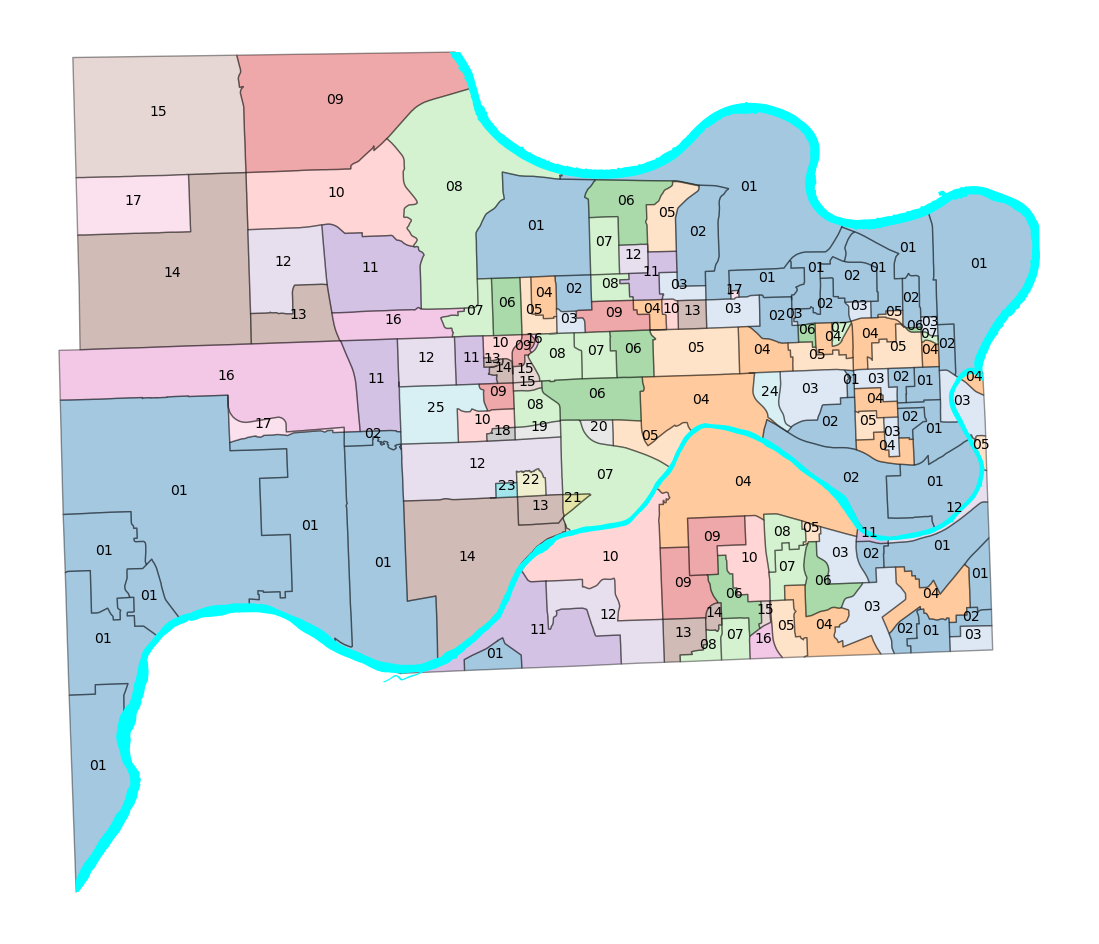

In [84]:
fig, ax = plt.subplots(figsize=(18,12))
# historic_dist.to_crs(epsg=3419).plot(ax=ax)
feature='PRECINCT'
kck_wards.to_crs(epsg=3419).plot(ax=ax, 
                                 column=feature,
                                 categorical=True,
                                #  legend=True,
                                 cmap='tab20',
                                 alpha=0.4,
                                #  legend_kwds=dict(loc=(-0.1,-0.5), ncols=4),
                                 edgecolor='k'
                                 )
# kck_lng.to_crs(epsg=3419).plot(ax=ax,
#              column='NAME',
#              categorical=True,
#             #  cmap='tab20c',
#              facecolor='None',
#             #  legend=True,
#             #  legend_kwds=dict(loc=(-0.1,-0.5), ncols=4),
#             #  alpha=0.0,
#              edgecolor='k'
#              )

for idx, row in kck_wards.iterrows():
    x = row['geometry'].centroid.x
    y = row['geometry'].centroid.y
    ax.annotate(text=row[feature], xy=(x,y),
                 horizontalalignment='center')
river.plot(ax=ax, color='cyan')
ax.set_axis_off()

In [81]:
armourdale_ward = '06'
argentine_ward = '07'  # approximately

In [70]:
kck_buildings = gpd.read_file("https://maps.wycokck.org/gisdata/shp/bldg_ftpt_py.zip")

c:\Users\sdotson\AppData\Local\miniforge3\envs\danger-season\lib\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)
c:\Users\sdotson\AppData\Local\miniforge3\envs\danger-season\lib\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)
c:\Users\sdotson\AppData\Local\miniforge3\envs\danger-season\lib\site-packages\pyogrio\geopandas.py:54: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, utc=True, **datetime_kwargs)


In [74]:
kck_buildings['CITY'].unique()

array(['Bonner Springs', 'Lake Quivira', 'Kansas City', 'Edwardsville',
       None, 'Kansas CCity'], dtype=object)

In [76]:
kck_buildings = kck_buildings[kck_buildings['CITY']=='Kansas City']

In [78]:
kck_buildings.describe(include='object')

,THEME1,THEME2,FEATURECOD,NAME,ADDRESS,CITY,ZIP,COMMENT,THEME3,MOD_BY,ADDED_BY,DATE_ADDED
count,1810,61,80324,2011,948,80331,2075,764,62807,80331,9471,80331
unique,11,6,16,594,624,1,12,271,8,1,5,316
top,Apartment,Day Care,Building General,The Woodlands Racetrack,9700 Leavenworth Rd,Kansas City,66112,2020,NC,ADOTY,DSCHAFFER,2012/03/12
freq,1243,42,74075,69,69,80331,395,302,61190,80331,7970,66625


In [85]:
armourdale['NAME'] = ['Armourdale West','Armourdale East']

c:\Users\sdotson\AppData\Local\miniforge3\envs\danger-season\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [95]:
kck_buildings.to_crs(epsg=3419, inplace=True)

c:\Users\sdotson\AppData\Local\miniforge3\envs\danger-season\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [97]:
kck_wards.to_crs(epsg=3419, inplace=True)

In [100]:
armourdale = kck_wards[kck_wards['WARD'] == armourdale_ward]
armourdale

,VTD,VTD_S,CITY,CITY_CODE,CITY_PREF,WARD,PRECINCT,BPU,UG,KS_HOUSE,...,BPU_At_Lg1,BPU_At_Lg2,BPU_At_Lg3,DATE_MOD,DATE_ADDED,MOD_BY,ADDED_BY,Shape_Leng,Shape_Area,geometry
68,KC06-02,600310,Kansas City,1,KC,06,02,3,2,37,...,None,None,None,2023-01-09,2023-01-09,GIS_EDITOR,GIS_EDITOR,46433.543935,5.578922e+07,"POLYGON ((2257706.000 296463.281, 2258080.500 ..."
74,KC06-01,600300,Kansas City,1,KC,06,01,3,2,37,...,None,None,None,2023-01-09,2023-01-09,ccooley,GIS_EDITOR,30244.383320,4.474095e+07,"POLYGON ((2274619.250 294173.125, 2274657.750 ..."


In [101]:
kck_buildings.columns

Index(['THEME1', 'THEME2', 'FEATURECOD', 'NAME', 'AGENCY', 'ADDRESS', 'CITY',
       'ZIP', 'COMMENT', 'CHNG_TYPE', 'SOURCE', 'X', 'Y', 'NUMSTORY',
       'BLDGHEIGHT', 'THEME3', 'LAT', 'LONG', 'MOD_BY', 'ADDED_BY', 'DATE_MOD',
       'DATE_ADDED', 'Shape_area', 'Shape_len', 'geometry'],
      dtype='object')

In [102]:
kck_buildings['THEME1'].unique()

array([None, 'Church', 'Apartment', 'Retail', 'Cemetery',
       'Local Government', 'Points of Interest', 'Fire', 'Park',
       'Education', 'State/Federal', 'Police'], dtype=object)

In [103]:
kck_buildings['THEME2'].unique()


array([None, 'Day Care', 'Retail', 'Apartment', 'Points of Interest',
       'Education', 'Grocery'], dtype=object)

In [146]:
kck_buildings['THEME3'].unique()


array([None, 'NC', 'IMPRV ERR', 'IMPRV ERR1', 'IMPRV ERR2', 'DEL ?',
       'IPERR', 'Points of Interest', 'Hospital'], dtype=object)

In [105]:
armourdale_buildings = gpd.sjoin(kck_buildings, armourdale, how='inner')

In [118]:
armourdale_buildings['FEATURECOD'].unique()

array(['Building General', 'Industry', 'Government and Military',
       'Commercial and Retail',
       'Public Attractions and Landmark Buildings', 'Energy',
       'Information and Communication', 'Transportation Facilities',
       'Emergency Response and Law Enforcement', 'Banking and Finance',
       'Education', 'Water Supply and Treatment'], dtype=object)

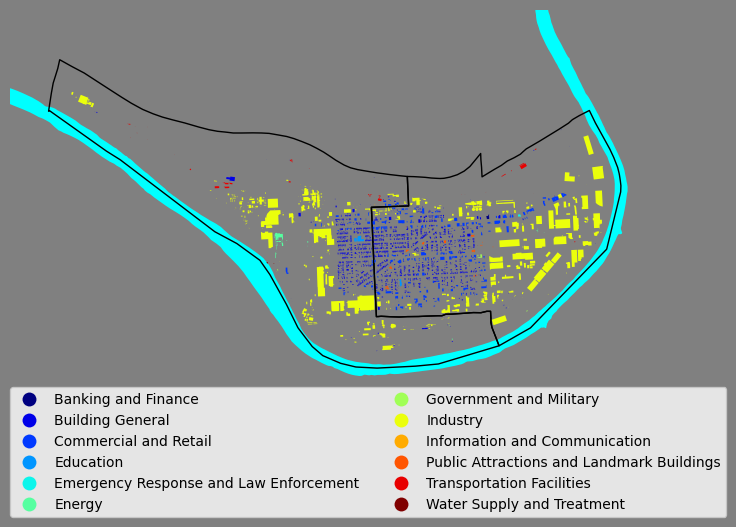

In [144]:
fig, ax = plt.subplots(figsize=(8,6), facecolor='gray')
# historic_dist.to_crs(epsg=3419).plot(ax=ax)
feature='WARD'
river.plot(ax=ax, color='cyan')
armourdale.plot(ax=ax,
                facecolor='None',
                # color='tan',
                # alpha=0.35,
                edgecolor='k'
                )
armourdale_buildings.plot(ax=ax,
                          column='FEATURECOD',
                          categorical=True,
                          legend=True,
                          cmap='jet',
                          legend_kwds=dict(loc=(0,-0.2), ncols=2))
# armourdale_buildings[armourdale_buildings['FEATURECOD']=='Energy'].plot(ax=ax,color='red')
ax.set_axis_off()
ax.set_xlim(2.253e6, 2.275e6)
ax.set_ylim(285e3, 300e3)
# ax.set_facecolor('gray')
plt.show()

In [116]:
armourdale_buildings.describe(include='object')

,THEME1,THEME2,FEATURECOD,NAME,ADDRESS,CITY_left,ZIP,COMMENT,THEME3,MOD_BY_left,...,UG_COMM_NA,Senator,County,Representa,BPU_Member,BPU_At_Lg1,BPU_At_Lg2,BPU_At_Lg3,MOD_BY_right,ADDED_BY_right
count,5,0,2478,5,7,2478,7,13,1778,2478,...,0,0,2478,0,0,0,0,0,2478,2478
unique,1,0,12,5,7,1,1,7,5,1,...,0,0,1,0,0,0,0,0,2,1
top,Church,NaN,Building General,First Christian Church,1101 Argentine Blvd.,Kansas City,66105,w2016,NC,ADOTY,...,NaN,NaN,WY,NaN,NaN,NaN,NaN,NaN,ccooley,GIS_EDITOR
freq,5,NaN,1575,1,1,2478,7,5,1754,2478,...,NaN,NaN,2478,NaN,NaN,NaN,NaN,NaN,1470,2478


In [145]:
armourdale_buildings.set_index(['FEATURECOD',''])

,THEME1,THEME2,FEATURECOD,NAME,AGENCY,ADDRESS,CITY_left,ZIP,COMMENT,CHNG_TYPE,...,BPU_Member,BPU_At_Lg1,BPU_At_Lg2,BPU_At_Lg3,DATE_MOD_right,DATE_ADDED_right,MOD_BY_right,ADDED_BY_right,Shape_Leng,Shape_Area
15646,None,None,Building General,None,0,None,Kansas City,None,None,4,...,None,None,None,None,2023-01-09,2023-01-09,GIS_EDITOR,GIS_EDITOR,46433.543935,5.578922e+07
15953,None,None,Industry,None,0,None,Kansas City,None,None,4,...,None,None,None,None,2023-01-09,2023-01-09,GIS_EDITOR,GIS_EDITOR,46433.543935,5.578922e+07
16132,None,None,Industry,None,0,None,Kansas City,None,None,4,...,None,None,None,None,2023-01-09,2023-01-09,GIS_EDITOR,GIS_EDITOR,46433.543935,5.578922e+07
16488,None,None,Industry,None,0,None,Kansas City,None,None,4,...,None,None,None,None,2023-01-09,2023-01-09,GIS_EDITOR,GIS_EDITOR,46433.543935,5.578922e+07
16503,None,None,Industry,None,0,None,Kansas City,None,None,4,...,None,None,None,None,2023-01-09,2023-01-09,GIS_EDITOR,GIS_EDITOR,46433.543935,5.578922e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87171,None,None,Building General,None,0,None,Kansas City,None,None,3,...,None,None,None,None,2023-01-09,2023-01-09,ccooley,GIS_EDITOR,30244.383320,4.474095e+07
87172,None,None,Building General,None,0,None,Kansas City,None,None,3,...,None,None,None,None,2023-01-09,2023-01-09,ccooley,GIS_EDITOR,30244.383320,4.474095e+07
87173,None,None,Building General,None,0,None,Kansas City,None,None,4,...,None,None,None,None,2023-01-09,2023-01-09,GIS_EDITOR,GIS_EDITOR,46433.543935,5.578922e+07
87336,None,None,Education,None,0,None,Kansas City,None,2020,3,...,None,None,None,None,2023-01-09,2023-01-09,GIS_EDITOR,GIS_EDITOR,46433.543935,5.578922e+07


In [152]:
%%time
cjest_url = "https://static-data-screeningtool.geoplatform.gov/data-versions/1.0/data/score/downloadable/1.0-shapefile-codebook.zip"
if not os.path.exists("..\\..\\cjest-data\\"):
    print('Downloading file from internet')
    r = requests.get(cjest_url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall("..\\..\\cjest-data\\")
    cjest_df = gpd.read_file("..\\..\\cjest-data\\usa.zip")
else:
    cjest_df = gpd.read_file("..\\..\\cjest-data\\usa.zip")

CPU times: total: 14.3 s
Wall time: 53.8 s


In [154]:
kck_cejst = cjest_df[cjest_df['CF']=='Wyandotte County']

In [156]:
kck_cejst.columns

Index(['GEOID10', 'SF', 'CF', 'DF_PFS', 'AF_PFS', 'HDF_PFS', 'DSF_PFS',
       'EBF_PFS', 'EALR_PFS', 'EBLR_PFS',
       ...
       'AGE_10', 'AGE_MIDDLE', 'AGE_OLD', 'TA_COU_116', 'TA_COUNT_C',
       'TA_PERC', 'TA_PERC_FE', 'UI_EXP', 'THRHLD', 'geometry'],
      dtype='object', length=124)

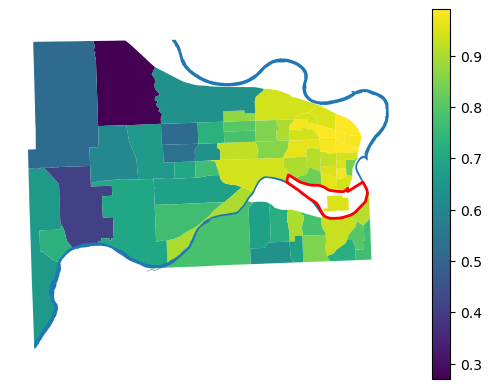

In [164]:
fig, ax= plt.subplots()
kck_cejst.to_crs(epsg=3419).plot(ax=ax,column='EBF_PFS',legend=True)
river.to_crs(epsg=3419).plot(ax=ax)
armourdale.dissolve('WARD').plot(ax=ax, facecolor='None', edgecolor='r', lw=2)
ax.set_axis_off()